# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [1]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(arquivo)
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [2]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']

for col in bin_cols:
    data[col] = LabelBinarizer().fit_transform(data[col])
    
data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns)    

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [3]:
x_cols = [x for x in data.columns if x != 'churned']

X_data = data[x_cols]
y_data = data['churned']

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [5]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

print(accuracy(y_data, y_pred))

0.9422


## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [6]:
knn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

print(accuracy(y_data, y_pred))

1.0


In [7]:
knn = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

print(accuracy(y_data, y_pred))

0.9456


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [8]:
score_list = list()
for n in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn = knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data)
    def accuracy(real, predict):
        return sum(y_data == y_pred) / float(real.shape[0])
    accuracy = accuracy(y_data, y_pred)
    score_list.append( (n, accuracy))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
print(score_df)

     k  accuracy
0    1    1.0000
1    2    0.9292
2    3    0.9422
3    4    0.9154
4    5    0.9284
5    6    0.9156
6    7    0.9254
7    8    0.9122
8    9    0.9224
9   10    0.9092
10  11    0.9158
11  12    0.9076
12  13    0.9148
13  14    0.9050
14  15    0.9098
15  16    0.9044
16  17    0.9080
17  18    0.9028
18  19    0.9078


In [9]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

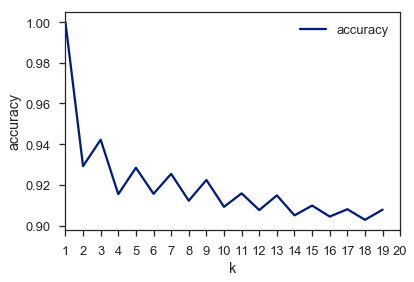

In [10]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));